#                  Decision Tree
##    Use decision trees to prepare a model on fraud data
      treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fraud=pd.read_csv("Fraud_check.csv")

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


##### EDA

In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
fraud.shape

(600, 6)

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

###  outlier detection

<AxesSubplot:>

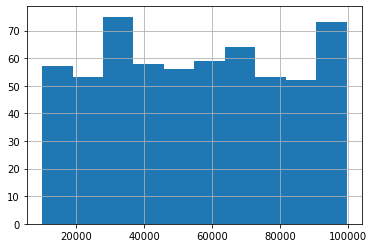

In [10]:
fraud['Taxable.Income'].hist()

<AxesSubplot:>

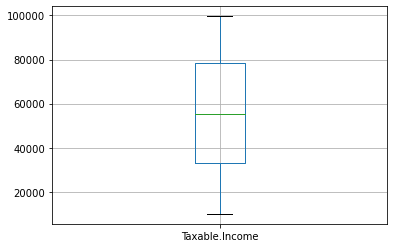

In [11]:
fraud.boxplot(column=['Taxable.Income'])

In [12]:
# descriptive statistics
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [13]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### scatterplot and correlation analysis

In [14]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [15]:
# correlation
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


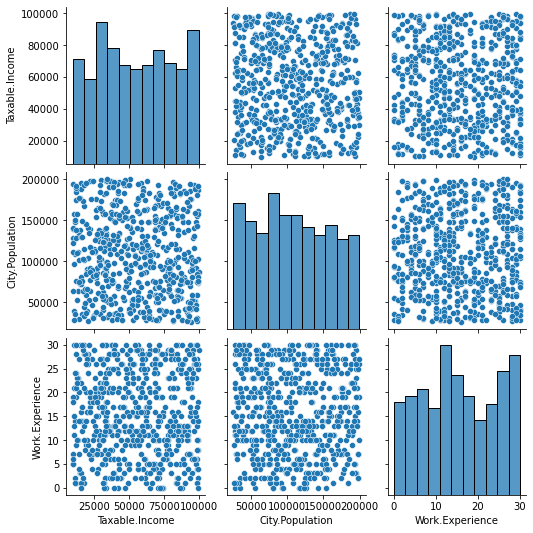

In [18]:
import seaborn as sns
sns.pairplot(fraud)
plt.show()

In [4]:
#converting taxable income variable to bucketing
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
#droping taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [6]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [7]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype==object:
        fraud[column_name]=le.fit_transform(fraud[column_name])
    else:
         pass

In [8]:
#splitting data into features &labels
features=fraud.iloc[:,0:5]
labels=fraud.iloc[:,5]

In [9]:
#collecting column names
colnames=list(fraud.columns)

In [10]:
colnames

['undergrad', 'marital', 'population', 'experience', 'urban', 'income']

In [11]:
predictors=colnames[0:5]

In [12]:
predictors

['undergrad', 'marital', 'population', 'experience', 'urban']

In [14]:
target=colnames[5]

In [15]:
target

'income'

In [16]:
#splitting data into train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,stratify=labels)

In [17]:
#model building
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs=3,n_estimators=15,oob_score=True,criterion="entropy")
model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [18]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=350623070),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1983849505),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=627102230),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=900344013),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=691269712),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1643085914),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2101592195),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=115461058),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [19]:
model.classes_

array([0, 1])

In [20]:
model.n_features_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5

In [21]:
model.n_classes_

2

In [22]:
model.n_outputs_

1

In [23]:
model.oob_score_

0.73125

In [24]:
##prediction on train data
prediction=model.predict(x_train)

In [25]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [26]:
##Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train,prediction)

In [27]:
accuracy

0.9875

In [28]:
np.mean(prediction==y_train)

0.9875

In [29]:
##confusion matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_train,prediction)

In [30]:
confusion

array([[381,   0],
       [  6,  93]], dtype=int64)

In [31]:
##prediction on test data
pred_test=model.predict(x_test)

In [32]:
pred_test

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
#accuracy
acc_test=accuracy_score(y_test,pred_test)

In [34]:
acc_test

0.7083333333333334

In [31]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=6a68451f507fa2ff252381e6eff2c5b2e11f86808331f073a3a78b70b0a6e7b1
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [34]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d5d4ecd25f868ccadfcffaf044e5953dbb42573f35479bb28ca29f34b7496dec
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


# Building Decision Tree Classifier using Entropy criteria

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [37]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

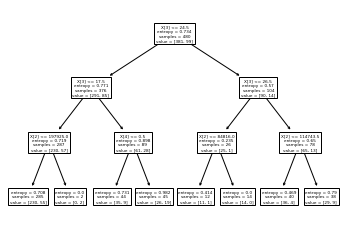

In [38]:
#plot decision tree
tree.plot_tree(model);

In [39]:
fn=['undergrad','marital','population','experience','urban']
cn=['Good','Risky']

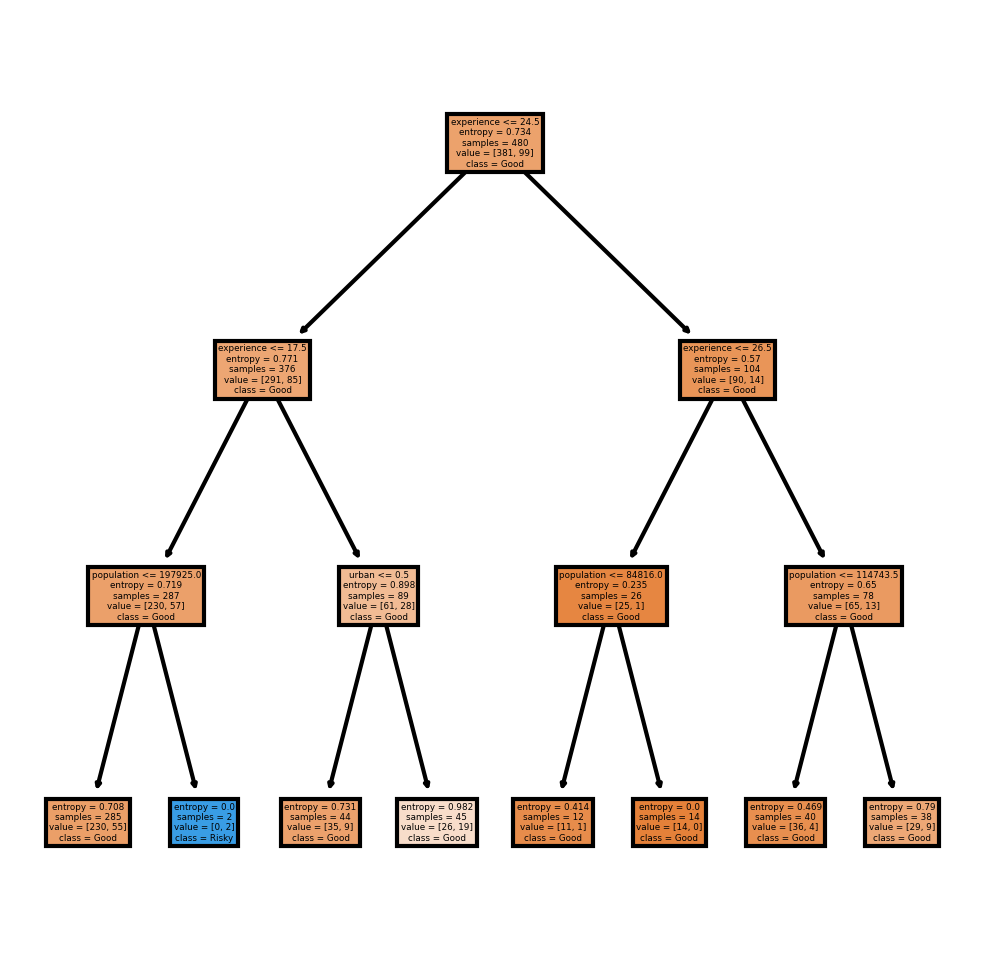

In [43]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [46]:
!pip install series

  Using cached series-2.35.36-py3-none-any.whl
  Using cached tek-4.1.1-py3-none-any.whl
  Using cached golgi-2.0.1-py3-none-any.whl
  Using cached guessit-3.1.0-py3-none-any.whl
  Using cached python_mpv-0.4.5-py3-none-any.whl
  Using cached Flask-0.12.2-py2.py3-none-any.whl (83 kB)
  Using cached Werkzeug-0.16.0-py2.py3-none-any.whl (327 kB)
  Using cached alembic-0.9.10-py2.py3-none-any.whl
  Using cached sqlpharmacy-3.0.0-py3-none-any.whl
  Using cached tek_utils-4.0.1-py3-none-any.whl
  Using cached lxml-4.2.3.tar.gz (4.4 MB)
  Using cached Mako-1.2.1-py3-none-any.whl (78 kB)
  Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
  Using cached babelfish-0.6.0-py3-none-any.whl (93 kB)
  Using cached rebulk-2.0.1-py3-none-any.whl
  Using cached crystalmethod-3.0.0-py3-none-any.whl
  Using cached cfscrape-2.1.1-py3-none-any.whl (12 kB)
  Using cached pyquery-1.4.3-py3-none-any.whl (22 kB)
  Using cached ThePirateBay-1.3.5-py3-none-any.whl


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Dell\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-lmy1da6v\\lxml_ba3f7072dd7b4117a31e775aba1039b7\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-lmy1da6v\\lxml_ba3f7072dd7b4117a31e775aba1039b7\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Dell\AppData\Local\Temp\pip-wheel-4736ptvw'
       cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-lmy1da6v\lxml_ba3f7072dd7b4117a31e775aba1039b7\
  Complete output (77 lines):
  Building lxml version 4.2.3.
  Building without Cython.
  ERROR: b"'xslt-config' is not recognized as an internal or external 

  Using cached dateutils-0.6.12-py2.py3-none-any.whl (5.7 kB)
  Running setup.py clean for lxml
Failed to build lxml
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
    Running setup.py install for lxml: started
    Running setup.py install for lxml: finished with status 'error'
  Rolling back uninstall of lxml
  Moving to c:\users\dell\anaconda3\lib\site-packages\lxml-4.8.0.dist-info\
   from C:\Users\Dell\anaconda3\Lib\site-packages\~xml-4.8.0.dist-info
  Moving to c:\users\dell\anaconda3\lib\site-packages\lxml\
   from C:\Users\Dell\anaconda3\Lib\site-packages\~xml



  copying src\lxml\isoschematron\resources\xsl\XSD2Schtrn.xsl -> build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl
  creating build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl\iso-schematron-xslt1
  copying src\lxml\isoschematron\resources\xsl\iso-schematron-xslt1\iso_abstract_expand.xsl -> build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl\iso-schematron-xslt1
  copying src\lxml\isoschematron\resources\xsl\iso-schematron-xslt1\iso_dsdl_include.xsl -> build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl\iso-schematron-xslt1
  copying src\lxml\isoschematron\resources\xsl\iso-schematron-xslt1\iso_schematron_message.xsl -> build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl\iso-schematron-xslt1
  copying src\lxml\isoschematron\resources\xsl\iso-schematron-xslt1\iso_schematron_skeleton_for_xslt1.xsl -> build\lib.win-amd64-3.9\lxml\isoschematron\resources\xsl\iso-schematron-xslt1
  copying src\lxml\isoschematron\resources\xsl\iso-schematron-xslt1\iso_svrl_for_x

In [48]:
#predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts() #getting the count of each category

0    120
dtype: int64

In [49]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
pd.crosstab(y_test,preds) # to understand the correct & wrong predictions

col_0,0
income,
0,95
1,25


In [52]:
#accuracy
np.mean(preds==y_test)*100

79.16666666666666

# Building Decision Tree Classifier(CART) using Gini criteria

In [53]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [54]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
#prediction &computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7916666666666666

# Decision Tree Regression Example

In [56]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [57]:
array=fraud.values

In [58]:
x=array[:,0:3]
y=array[:,3]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [60]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
# find the accuracy
model.score(x_test,y_test)

-1.2533924210433467